___
**MODUL 6 - PERTEMUAN 1 (PRAKTIKUM)**

- **ANN untuk Model Klasifikasi** (**Python**  | [Bahasa R](https://www.kaggle.com/code/cahyaalkahfi/klasifikasi-obesitas-dengan-keras-r))
- **ANN untuk Model Regresi** ([Python](https://www.kaggle.com/cahyaalkahfi/prediksi-abalone-dengan-keras-python) | [Bahasa R](https://www.kaggle.com/cahyaalkahfi/prediksi-abalone-dengan-keras-r))
  
**Asisten:  Cahya Alkahfi (Kelas A)    |    Alfa Nugraha (Kelas B)**   
___

## KLASIFIKASI MULTIKELAS

## 1.a Penyiapan Data

In [1]:
import pandas as pd
# memuat data CSV
data = pd.read_csv("/kaggle/input/obesitas/obesitas.csv")

# menampilkan info data
print(data.info())

# menampilkan label dari kelas target
print(data["NObeyesdad"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## 1.b Pembagian Data dan Features Scaling

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# menentukan kolom fitur dan target
X = data.drop(["NObeyesdad"], axis=1)
y = data["NObeyesdad"]

# list kolom kategorik
cat_features = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

# list kolom numerik
num_features = X.columns[~X.columns.isin(cat_features)]

# merubah fitur kategorik menjadi One Hot Encoding
# dapat pula menggunakan to_categorical dari tensorflow.keras
# atau OneHotEncoder dari sklearn.preprocessing
X_cat = pd.get_dummies(X[cat_features], drop_first=True)

# mengabungkan kembali fitur numerik dan OHE
X_final = pd.concat([X[num_features], X_cat], axis=1)

# membagi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.25, random_state=123
)

# features scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# merubah kelas label menjadi numerik
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

## 1.c Model 1 (1 hidden layer)

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# Membangun model neural network
model_1 = Sequential()
model_1.add(Dense(units=100, input_dim=X_train.shape[1], activation="relu"))   # hidden layer ke-1
model_1.add(Dense(units=4, activation="softmax"))  # output layar : unit=4 (sebanyak kelas output)

# Mengompilasi model
model_1.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Melatih model
history = model_1.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
)

print(model_1.summary())

# Evaluasi model pada data test
scores = model_1.evaluate(X_test, y_test)
print("\n", scores,"\n" )

print("Loss:", scores[0])
print("Accuracy:", scores[1])

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 1.1708 - accuracy: 0.4700 - val_loss: 1.1186 - val_accuracy: 0.4700
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0552 - accuracy: 0.5126 - val_loss: 1.0234 - val_accuracy: 0.5331
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9714 - accuracy: 0.5648 - val_loss: 0.9422 - val_accuracy: 0.5741
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.8952 - accuracy: 0.6058 - val_loss: 0.8753 - val_accuracy: 0.6057
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.6501 - val_loss: 0.8408 - val_accuracy: 0.6151
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7963 - accuracy: 0.6603 - val_loss: 0.7974 - val_accuracy: 0.6341
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7498 - accuracy: 0.6927 - val_loss: 0.7511 - val_accuracy: 0.6404
Epoch 8/100
4

## 1.d Prediksi Data Uji (MODEL 1)

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluasi model pada data test
loss, accuracy = model_1.evaluate(X_test, y_test)

# melihat prediksi pada data test
y_pred = model_1.predict(X_test)

# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(y_pred, axis=1)

# Menampilkan hasil prediksi
print("\n", y_pred_class)

# Mengonversi y_test menjadi label kelas
y_test_class = np.argmax(y_test, axis=1)

print()
# menampilkan metrik klasifikasi
print(classification_report(y_test_class, y_pred_class))

17/17 [==============================] - 0s 798us/step

 [0 2 2 3 2 2 2 3 2 1 2 2 1 2 3 3 2 3 2 0 3 3 2 3 0 2 3 2 3 2 3 3 2 1 2 3 3
 3 2 0 2 2 2 3 3 2 3 2 2 3 0 3 2 1 2 0 0 3 3 1 2 2 2 2 3 1 0 2 0 3 3 3 0 2
 2 2 2 3 3 2 3 1 3 2 2 2 2 2 2 2 2 2 2 3 2 1 2 2 3 2 2 2 0 3 2 2 0 2 1 3 2
 3 2 3 2 3 2 2 1 2 2 2 2 3 3 2 1 1 0 3 2 1 0 0 2 2 2 2 2 2 2 3 3 2 2 1 0 2
 2 2 3 3 2 3 3 3 3 3 2 0 2 2 2 3 2 1 0 2 1 3 0 2 2 3 1 2 3 0 2 3 2 3 2 2 2
 3 0 1 3 3 2 0 2 0 2 2 2 2 3 2 1 3 1 2 3 0 3 3 2 2 2 2 2 0 2 2 0 2 3 2 2 2
 1 1 3 2 2 3 2 0 2 3 0 3 0 2 2 1 0 2 2 3 1 2 3 1 0 2 3 3 3 2 2 2 0 2 0 0 3
 2 0 2 1 3 2 2 0 0 0 2 2 2 2 2 1 3 0 3 2 1 2 3 2 3 2 0 2 1 3 0 3 3 1 1 3 0
 3 2 3 2 0 0 1 3 0 2 1 2 2 2 3 3 2 0 1 2 3 3 0 3 3 1 0 0 2 2 2 2 1 2 3 1 3
 0 1 2 2 2 2 3 1 3 2 2 1 2 1 0 0 0 3 2 2 2 2 2 2 2 0 2 0 2 1 2 2 0 2 2 2 3
 2 2 2 2 3 2 2 1 2 2 1 3 3 1 1 1 0 0 3 2 2 1 1 2 2 2 0 2 1 0 3 2 0 1 0 3 2
 3 3 2 3 1 2 3 1 2 2 3 0 2 3 2 1 0 3 0 3 1 2 3 3 3 2 3 2 2 3 0 0 1 0 1 2 2
 3 1 1 2 3 3 1 2 2 1 2 3 3 3 2 2 3 2 2 1 3 

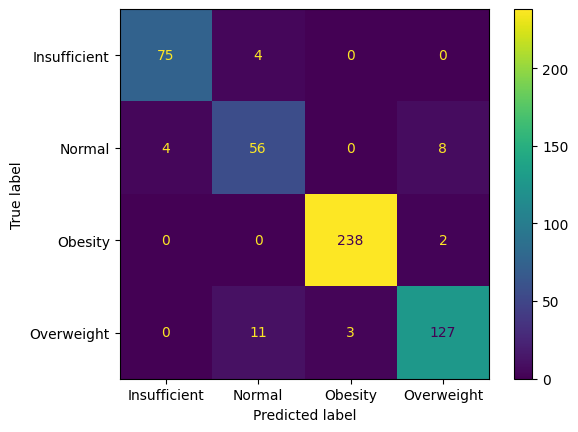

In [5]:
import matplotlib.pyplot as plt

# memvisualisasikan confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix(y_pred_class, y_test_class), display_labels=y_test.columns
)

disp.plot()
plt.show()

## 1.e Model 2 (2 hidden layer + dropout)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Membangun model neural network
model_2 = Sequential()
model_2.add(Dense(units=128, input_dim=X_train.shape[1], activation="relu"))   # hidden layer ke-1
model_2.add(Dropout(0.2))                                                      # dropout
model_2.add(Dense(units=64, activation="relu"))                                # hidden layer ke-2
model_2.add(Dropout(0.2))                                                      # dropout
model_2.add(Dense(units=4, activation="softmax"))                              # output layer

# Mengompilasi model
model_2.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Melatih model
model_2.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

print(model_2.summary())

print()

# Evaluasi model pada data test
loss, accuracy = model_2.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3072      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 11,588
Trainable params: 11,588
Non-trainable params: 0
_________________________________________________________________
None

17/17 [==============================] - 0s 

## 1.f Menyimpan dan Memuat Model (Model 2)

In [7]:
from keras.models import load_model

# menyimpan model_2 dengan method save
model_2.save("model_2.keras")

# memuat model_2 dengan fungsi load_model dari keras.models
my_model_2 = load_model("model_2.keras")

my_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3072      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 11,588
Trainable params: 11,588
Non-trainable params: 0
_________________________________________________________________


## 1.g Prediksi Data Uji (MY MODEL 2)

17/17 [==============================] - 0s 1ms/step

 [0 2 2 3 2 2 2 3 2 1 2 2 1 2 3 3 2 3 2 1 3 3 2 3 0 2 3 2 3 2 3 3 2 1 2 3 3
 3 2 0 2 2 2 3 3 2 3 2 2 3 0 3 2 1 2 0 0 3 3 1 2 2 2 2 3 1 0 2 0 3 3 3 0 2
 2 2 2 3 3 2 3 1 3 2 2 2 2 2 2 2 2 2 2 3 2 1 2 2 3 2 2 2 0 3 2 2 0 2 1 3 2
 3 2 3 2 3 2 2 3 2 2 2 2 3 3 2 1 1 0 3 2 1 0 0 2 2 2 2 2 2 2 3 3 2 2 1 0 2
 2 2 3 3 2 3 3 3 3 3 2 0 2 2 2 3 2 1 0 2 1 3 0 2 2 3 1 2 3 0 2 3 2 3 2 2 2
 1 0 1 3 3 2 0 2 0 2 2 2 2 3 2 1 3 1 2 3 0 3 3 2 2 2 2 2 0 2 2 0 2 3 2 2 2
 1 1 3 2 2 3 2 0 2 3 0 3 0 2 2 1 0 2 2 3 1 2 3 0 0 2 3 3 3 2 2 2 0 2 0 0 1
 2 0 2 1 3 2 2 0 0 0 2 2 2 2 2 1 3 0 3 2 1 2 3 2 1 2 0 2 1 3 0 3 3 1 1 3 0
 3 2 3 2 0 0 1 3 0 2 1 2 2 2 3 3 2 0 1 2 3 3 0 3 3 1 0 0 2 2 2 2 3 2 3 1 3
 0 1 2 2 2 2 3 0 3 2 2 1 2 1 0 0 0 3 2 2 2 2 2 2 2 0 2 0 2 1 2 2 0 2 2 2 3
 2 2 2 2 3 2 2 3 2 2 0 3 3 1 1 1 0 0 3 2 2 1 1 2 2 2 0 2 1 0 3 2 0 1 0 3 2
 3 3 2 3 1 2 3 1 2 2 3 0 2 3 2 1 0 3 0 3 1 2 3 3 3 2 3 2 3 3 0 0 1 0 1 2 2
 3 1 1 2 3 3 1 2 2 1 2 3 3 3 2 2 3 2 2 1 3 2 

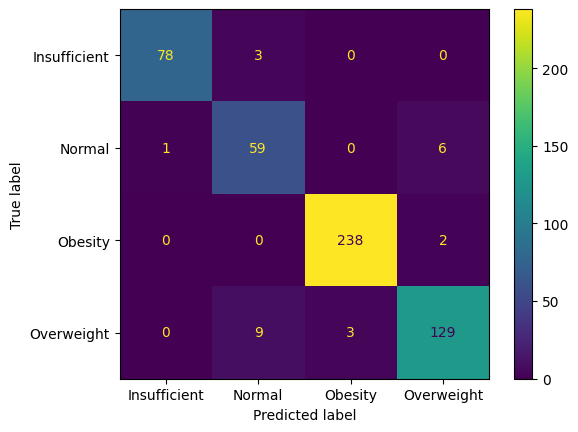

In [8]:
# Evaluasi model pada data test
loss, accuracy = my_model_2.evaluate(X_test, y_test)

# melihat prediksi pada data test
y_pred = my_model_2.predict(X_test)

# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(y_pred, axis=1)

# Menampilkan hasil prediksi
print("\n", y_pred_class)

# Mengonversi y_test menjadi label kelas
y_test_class = np.argmax(y_test, axis=1)

print()

# menampilkan metrik klasifikasi
print(classification_report(y_test_class, y_pred_class))

print()

# memvisualisasikan confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix(y_pred_class, y_test_class), display_labels=y_test.columns
)

disp.plot()
plt.show()

## 1.h Model 3 (2 hidden layer + dropout + callback)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

# menentukan nama dan path file untuk penyimpanan model
filepath = "model_check.keras"

# mengatur kriteria checkpoint
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

# mengatur kondisi untuk early stopping
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    verbose=1,
)

# Membangun model neural network
model_3 = Sequential()
model_3.add(Dense(units=64, input_dim=X_train.shape[1], activation="relu"))
model_3.add(Dropout(0.1))
model_3.add(Dense(units=32, activation="relu"))
model_3.add(Dropout(0.1))
model_3.add(Dense(units=4, activation="softmax"))

# Mengompilasi model
model_3.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Melatih model
model_3.fit(
    X_train,
    y_train,
    epochs=100,
    # validation_split=0.2,
    validation_data = [X_test, y_test],
    callbacks=[checkpoint, early_stopping],  # mengatur checkpoint dan early stopping
)

Epoch 1/100
34/50 [===================>..........] - ETA: 0s - loss: 1.2788 - accuracy: 0.4062 
Epoch 1: val_accuracy improved from -inf to 0.46591, saving model to model_check.keras
50/50 [==============================] - 1s 5ms/step - loss: 1.2371 - accuracy: 0.4258 - val_loss: 1.1365 - val_accuracy: 0.4659
Epoch 2/100
36/50 [====================>.........] - ETA: 0s - loss: 1.0852 - accuracy: 0.4948
Epoch 2: val_accuracy improved from 0.46591 to 0.52652, saving model to model_check.keras
50/50 [==============================] - 0s 2ms/step - loss: 1.0579 - accuracy: 0.5117 - val_loss: 1.0214 - val_accuracy: 0.5265
Epoch 3/100
33/50 [==================>...........] - ETA: 0s - loss: 0.9763 - accuracy: 0.5814
Epoch 3: val_accuracy improved from 0.52652 to 0.55682, saving model to model_check.keras
50/50 [==============================] - 0s 2ms/step - loss: 0.9582 - accuracy: 0.5900 - val_loss: 0.9097 - val_accuracy: 0.5568
Epoch 4/100
37/50 [=====================>........] - ETA: 0s

## 1.i Memuat Model Hasil Checkpoint + Prediksi

In [10]:
my_model_check = load_model("model_check.keras")

my_model_check.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1536      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3,748
Trainable params: 3,748
Non-trainable params: 0
_________________________________________________________________


17/17 [==============================] - 0s 849us/step

 [0 2 2 3 2 2 2 3 2 1 2 2 1 2 3 3 2 3 2 1 3 3 2 3 1 2 3 2 3 2 3 3 2 0 2 3 1
 3 2 0 2 2 2 3 3 2 3 2 2 3 0 3 2 1 2 0 0 3 3 1 2 2 2 2 3 1 0 2 0 3 3 3 0 2
 2 2 2 3 3 2 3 1 3 2 2 2 2 2 2 2 2 2 2 3 2 1 2 2 3 2 2 2 0 3 2 2 0 2 1 3 2
 3 2 3 2 3 2 2 1 2 2 2 2 3 3 2 1 1 0 3 2 1 0 0 2 2 2 2 2 2 2 3 3 2 2 1 0 2
 2 2 3 3 2 3 3 3 3 3 2 0 2 2 2 3 2 1 0 2 1 3 0 2 2 3 1 2 3 0 2 3 2 3 2 2 2
 3 0 1 3 3 2 0 2 0 2 2 2 2 3 2 1 3 1 2 3 0 3 3 2 2 2 2 2 0 2 2 0 2 3 2 2 2
 1 1 3 2 2 3 2 0 2 2 0 3 0 2 2 1 0 2 2 3 1 2 3 0 0 2 3 3 3 2 2 2 0 2 0 0 1
 2 0 2 1 3 2 2 0 0 0 2 2 2 2 2 1 3 0 3 2 1 2 3 2 3 2 0 2 1 3 0 3 3 1 1 3 0
 3 2 3 2 0 0 1 3 0 2 1 2 2 2 3 3 2 0 1 2 3 3 0 3 3 0 0 0 2 2 2 2 3 2 3 1 3
 0 1 2 2 2 2 3 0 3 2 2 1 2 1 0 0 0 3 2 2 2 2 2 2 2 0 2 0 2 1 2 2 0 2 2 2 2
 2 2 2 2 3 2 2 3 2 2 0 3 3 1 1 1 0 0 3 2 2 1 1 2 2 2 0 2 1 0 3 2 0 1 0 3 2
 3 3 2 3 1 2 3 0 2 2 3 0 2 3 2 1 0 3 0 3 1 2 3 3 3 2 3 2 3 3 0 0 1 0 3 2 2
 3 1 1 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 2 3 3 

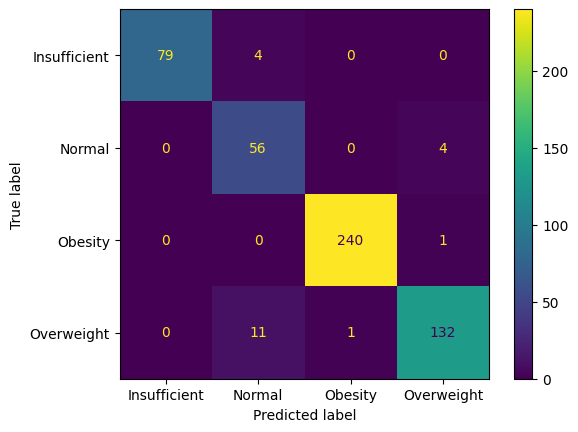

In [11]:
# Evaluasi model pada data test
loss, accuracy = my_model_check.evaluate(X_test, y_test)

# melihat prediksi pada data test
y_pred = my_model_check.predict(X_test)

# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(y_pred, axis=1)

# Menampilkan hasil prediksi
print("\n", y_pred_class)

# Mengonversi y_test menjadi label kelas
y_test_class = np.argmax(y_test, axis=1)

print()

# menampilkan metrik klasifikasi
print(classification_report(y_test_class, y_pred_class))

print()

# memvisualisasikan confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix(y_pred_class, y_test_class), display_labels=y_test.columns
)

disp.plot()
plt.show()

## KLASIFIKASI BINER  
  
Note: Agar lebih praktis, pada bagian ini akan kita gunakan dataset yang sama, namun targetnya adalah (Overweight vs Tidak Overweight)

## 2.a Penyiapan Data

In [12]:
# menduplikasi data sebelumnya
data_biner = data.copy()

data_biner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [13]:
def to_binary(level):
    return (level in ["Overweight", "Obesity"])

# merubah label menjadi biner (1: overweight, 0: Tidak Overweight)
data_biner["NObeyesdad"] = data_biner["NObeyesdad"].apply(to_binary)

data_biner["NObeyesdad"].unique()

array([False,  True])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# menentukan kolom fitur dan target
X = data_biner.drop(["NObeyesdad"], axis=1)
y = data_biner["NObeyesdad"]

# list kolom kategorik
cat_features = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

# list kolom numerik
num_features = X.columns[~X.columns.isin(cat_features)]

# merubah fitur kategorik menjadi One Hot Encoding
# dapat pula menggunakan to_categorical dari tensorflow.keras
# atau OneHotEncoder dari sklearn.preprocessing
X_cat = pd.get_dummies(X[cat_features], drop_first=True)

# mengabungkan kembali fitur numerik dan OHE
X_final = pd.concat([X[num_features], X_cat], axis=1)

# membagi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.25, random_state=123
)

# merubah skala fitur (menggunakan standardisasi)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# y sudah dalam bentuk 0 1
# y_train = pd.get_dummies(y_train)
# y_test = pd.get_dummies(y_test)

## 2.b Model (2 hidden layer + dropout + callback)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

# menentukan nama dan path file untuk penyimpanan model
filepath = "model_bin_check.keras"

# mengatur kriteria checkpoint
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=0,
)

# mengatur kondisi untuk early stopping
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    verbose=0,
)

# Membangun model neural network
model_bin = Sequential()
model_bin.add(Dense(units=64, input_dim=X_train.shape[1], activation="relu"))
model_bin.add(Dropout(0.1))
model_bin.add(Dense(units=32, activation="relu"))
model_bin.add(Dropout(0.1))
model_bin.add(Dense(units=1, activation="sigmoid"))       # units=1, activation="sigmoid"      

# Mengompilasi model
model_bin.compile(
    optimizer="adam",
    loss="binary_crossentropy",    # loss: binary_crossentropy
    metrics=["accuracy"],
)

# Melatih model
model_bin.fit(
    X_train,
    y_train,
    epochs=100,
    # validation_split=0.2,
    validation_data = [X_test, y_test],
    callbacks=[checkpoint, early_stopping],  # mengatur checkpoint dan early stopping
)

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 0.4826 - accuracy: 0.7562 - val_loss: 0.4278 - val_accuracy: 0.7633
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8383 - val_loss: 0.3136 - val_accuracy: 0.8561
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.8800 - val_loss: 0.2564 - val_accuracy: 0.8883
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.8951 - val_loss: 0.2206 - val_accuracy: 0.9129
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9217 - val_loss: 0.2018 - val_accuracy: 0.9242
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9255 - val_loss: 0.1898 - val_accuracy: 0.9223
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9236 - val_loss: 0.1920 - val_accuracy: 0.9167
Epoch 8/100
5

## 2.c Prediksi Data Uji

In [16]:
my_model_bin_check = load_model("model_bin_check.keras")

my_model_bin_check.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1536      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


17/17 [==============================] - 0s 973us/step

              precision    recall  f1-score   support

       False       0.97      0.92      0.95       150
        True       0.97      0.99      0.98       378

    accuracy                           0.97       528
   macro avg       0.97      0.95      0.96       528
weighted avg       0.97      0.97      0.97       528




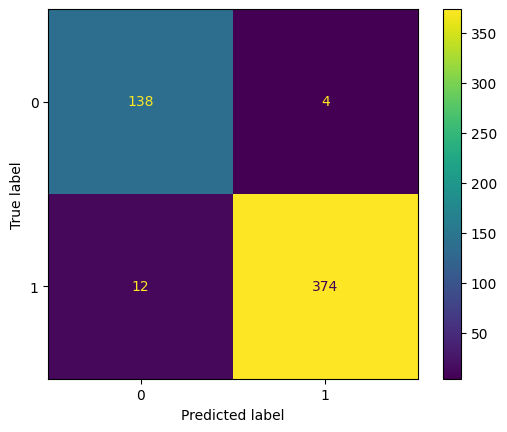

In [17]:
# Evaluasi model pada data test
loss, accuracy = my_model_bin_check.evaluate(X_test, y_test)

# melihat prediksi pada data test
y_pred = my_model_bin_check.predict(X_test)

# karena hasilnya berupa nilai 0-1, dengan cut-off 0.5 kita bisa menggunakan fungsi round saja
y_pred_class = np.round(y_pred)

print()

# menampilkan metrik klasifikasi
print(classification_report(y_test, y_pred_class))

print()

# memvisualisasikan confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix(y_pred_class, y_test)
)

disp.plot()
plt.show()

<br>
<hr>

notebook ini hanya berisi sintaks dan sedikit komentar saja. Untuk penjelasan lebih lengkap dapat dilihat pada tautan ini:
  
**[Model Neural Network Python menggunakan keras (Klasifikasi)](https://sainsdata.id/machine-learning/2751/neural-network-untuk-klasifikasi-multikelas-dengan-keras)**

<hr>